In [1]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import numba
sns.set()

In [2]:
ani_df = pd.read_csv('/Users/weipeng/Workspace/projects/bhmc3/data/animals/animals.csv')
ani_labels = ani_df.animal.values

In [3]:
print(ani_labels)

['Elephant' 'Rhino' 'Horse' 'Cow' 'Camel' 'Giraffe' 'Chimp' 'Gorilla'
 'Mouse' 'Squirrel' 'Tiger' 'Lion' 'Cat' 'Dog' 'Wolf' 'Seal' 'Dolphin'
 'Robin' 'Eagle' 'Chicken' 'Salmon' 'Trout' 'Bee' 'Iguana' 'Alligator'
 'Butterfly' 'Ant' 'Finch' 'Penguin' 'Cockroach' 'Whale' 'Ostrich' 'Deer']


In [4]:
reordered_ani_labels = [
    'Elephant', 'Rhino', 'Horse', 'Cow', 'Camel', 'Giraffe', 'Deer', 'Chimp', 'Gorilla', 
    'Mouse', 'Squirrel', 'Tiger', 'Lion', 'Cat', 'Dog', 'Wolf', 'Seal', 'Dolphin', 'Whale', 'Penguin', 
    'Salmon', 'Trout', 'Iguana', 'Alligator',
    'Butterfly', 'Bee', 'Ant', 'Cockroach', 'Finch', 'Robin', 'Eagle', 'Chicken', 'Ostrich'
]

ani_label_list = ani_labels.tolist()
reordered_ani_indices = []
for animal in reordered_ani_labels:
    reordered_ani_indices.append(ani_label_list.index(animal))

reordered_ani = dict(zip(reordered_ani_indices, range(33)))


In [5]:
def coocurrence(labels_at_lvl, level, reordered_ani=None):
    assert labels_at_lvl, 'please ensure a non-empty input'
    
    n = len(labels_at_lvl[0])
    res = np.zeros((n, n), dtype=np.float64)
    cooc = np.zeros((n, n), dtype=np.float64)
    
    for _, labels in enumerate(labels_at_lvl):
        cooc[:, :] = 0
        
        for i in range(n):
            for j in range(i):
                if labels[i] == labels[j]:
                    i_ = reordered_ani[i] if reordered_ani else i
                    j_ = reordered_ani[j] if reordered_ani else j
                    cooc[i_, j_] = cooc[j_, i_] = 1
        res += cooc
        assert cooc.max() == 1
        
    np.fill_diagonal(res, 0)

    res /= len(labels_at_lvl)
    xx, yy, coocs = [], [], []
    for i in range(n):
        for j in range(n):
            i_ = reordered_ani[i] if reordered_ani else i
            j_ = reordered_ani[j] if reordered_ani else j
            xx.append(i_)
            yy.append(j_)
            coocs.append(res[i_, j_])
           
        
    df = pd.DataFrame({
        'x': xx,
        'y': yy,
        'cooc': coocs,
    })
    df[r'$\ell$'] = level
    return df 


## BHMC

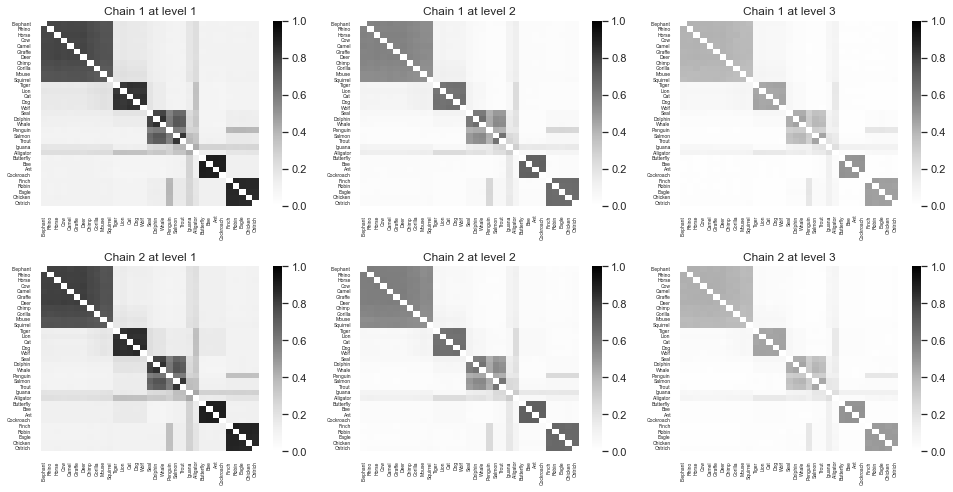

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(13.5, 7))

for ind in range(1, 3):
    path = '/Users/weipeng/Workspace/projects/rbhmc/coocurrence/animals/animals_0.0_0.0_{}/'.format(ind)

    all_labels = []
    for i in range(1, 50001):
        df = pd.read_csv('{}/animals_cooc_{}.csv'.format(path, i), header=0)
        val = df.values
        n = df.shape[0]
        if not all_labels:
            all_labels = [[] for _ in range(n)]

        for i in range(n):
            all_labels[i].append(val[i].tolist())

    cooc_dfs = []
    for i, labels in enumerate(all_labels):
        cooc_dfs.append(coocurrence(labels, i + 1, reordered_ani))

    dataname = 'animals'
    for i, cooc_df in enumerate(cooc_dfs):
        d = cooc_df.pivot('x', 'y', 'cooc')
        g = sns.heatmap(d, cmap='Greys', 
    #                     linecolor='black', linewidths=0.5, 
                        vmin=0, vmax=1,
                        xticklabels=reordered_ani_labels, 
                        yticklabels=reordered_ani_labels, 
                        ax=axes[ind-1, i])
        g.set(xlabel='', ylabel='')
        g.set_title('Chain {} at level {}'.format(ind, i + 1))
        g.set_yticklabels(reordered_ani_labels, fontsize=5)
        g.set_xticklabels(reordered_ani_labels, fontsize=5)

plt.tight_layout()
plt.savefig('{}-co-oc-0.0-0.0-rbhmc.pdf'.format(dataname))


## For RBHMC

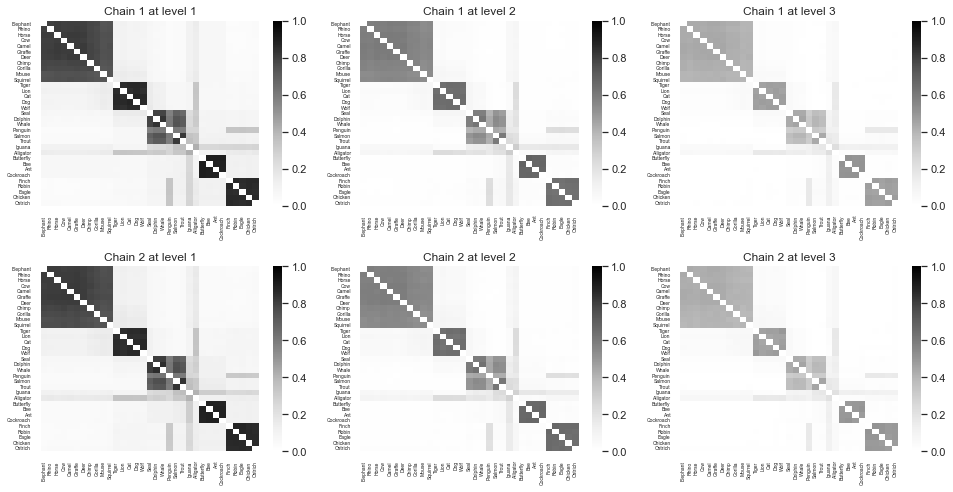

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(13.5, 7))

for ind in range(1, 3):
    path = '/Users/weipeng/Workspace/projects/rbhmc/coocurrence/animals/animals_0.1_0.1_{}/'.format(ind)

    all_labels = []
    for i in range(1, 50001):
        df = pd.read_csv('{}/animals_cooc_{}.csv'.format(path, i), header=0)
        val = df.values
        n = df.shape[0]
        if not all_labels:
            all_labels = [[] for _ in range(n)]

        for i in range(n):
            all_labels[i].append(val[i].tolist())

    cooc_dfs = []
    for i, labels in enumerate(all_labels):
        cooc_dfs.append(coocurrence(labels, i + 1, reordered_ani))

    dataname = 'animals'
    for i, cooc_df in enumerate(cooc_dfs):
#         plt.figure()
        d = cooc_df.pivot('x', 'y', 'cooc')
        g = sns.heatmap(d, cmap='Greys', 
    #                     linecolor='black', linewidths=0.5, 
                        vmin=0, vmax=1,
                        xticklabels=reordered_ani_labels, 
                        yticklabels=reordered_ani_labels, 
                        ax=axes[ind-1, i])
        g.set(xlabel='', ylabel='')
        g.set_title('Chain {} at level {}'.format(ind, i + 1))
        g.set_yticklabels(reordered_ani_labels, fontsize=5)
        g.set_xticklabels(reordered_ani_labels, fontsize=5)
#         plt.show()
#         g.get_figure().savefig('{}-co-oc-level-{}-0.1-0.1-{}-rbhmc.pdf'
#                                .format(dataname, i + 1, ind))

plt.tight_layout()
plt.savefig('{}-co-oc-0.1-0.1-rbhmc.pdf'.format(dataname))
#     plt.close('all')

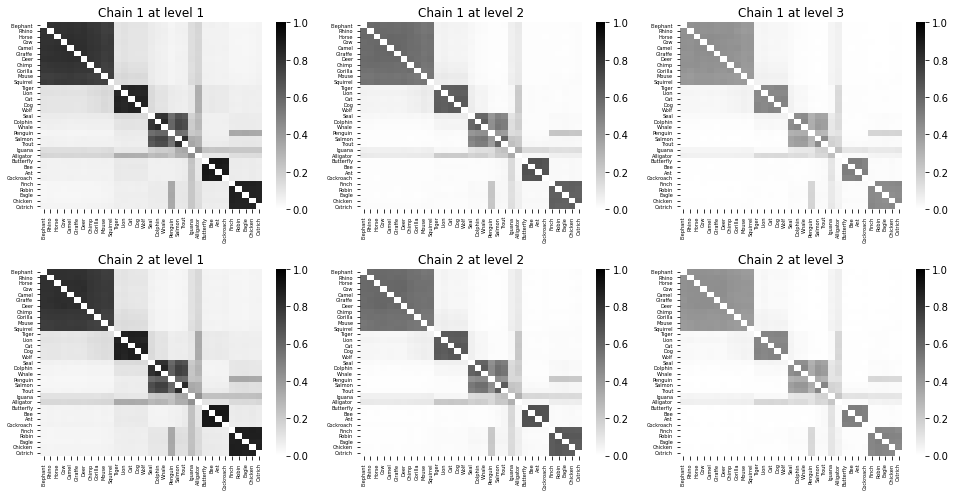

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(13.5, 7))

for ind in range(1, 3):
    path = '/Users/weipeng/Workspace/projects/rbhmc/coocurrence/animals/animals_0.1_1.0_{}/'.format(ind)

    all_labels = []
    for i in range(1, 50001):
        df = pd.read_csv('{}/animals_cooc_{}.csv'.format(path, i), header=0)
        val = df.values
        n = df.shape[0]
        if not all_labels:
            all_labels = [[] for _ in range(n)]

        for i in range(n):
            all_labels[i].append(val[i].tolist())

    cooc_dfs = []
    for i, labels in enumerate(all_labels):
        cooc_dfs.append(coocurrence(labels, i + 1, reordered_ani))

    dataname = 'animals'
    for i, cooc_df in enumerate(cooc_dfs):
#         plt.figure()
        d = cooc_df.pivot('x', 'y', 'cooc')
        g = sns.heatmap(d, cmap='binary', 
    #                     linecolor='black', linewidths=0.5, 
                        vmin=0, vmax=1,
                        xticklabels=reordered_ani_labels, 
                        yticklabels=reordered_ani_labels, 
                        ax=axes[ind-1, i])
        g.set(xlabel='', ylabel='')
        g.set_title('Chain {} at level {}'.format(ind, i + 1))
        g.set_yticklabels(reordered_ani_labels, fontsize=5)
        g.set_xticklabels(reordered_ani_labels, fontsize=5)
#         plt.show()
#         g.get_figure().savefig('{}-co-oc-level-{}-0.1-0.1-{}-rbhmc.pdf'
#                                .format(dataname, i + 1, ind))

plt.tight_layout()
plt.savefig('{}-co-oc-0.1-1.0-rbhmc.pdf'.format(dataname))
#     plt.close('all')

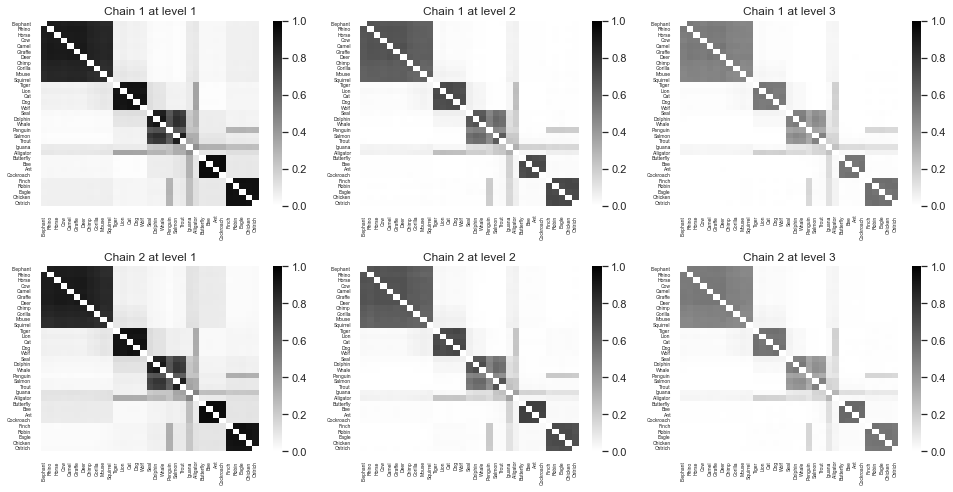

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(13.5, 7))

for ind in range(1, 3):
    path = '/Users/weipeng/Workspace/projects/rbhmc/coocurrence/animals/animals_0.1_10.0_{}/'.format(ind)

    all_labels = []
    for i in range(1, 50001):
        df = pd.read_csv('{}/animals_cooc_{}.csv'.format(path, i), header=0)
        val = df.values
        n = df.shape[0]
        if not all_labels:
            all_labels = [[] for _ in range(n)]

        for i in range(n):
            all_labels[i].append(val[i].tolist())

    cooc_dfs = []
    for i, labels in enumerate(all_labels):
        cooc_dfs.append(coocurrence(labels, i + 1, reordered_ani))

    dataname = 'animals'
    for i, cooc_df in enumerate(cooc_dfs):
#         plt.figure()
        d = cooc_df.pivot('x', 'y', 'cooc')
        g = sns.heatmap(d, cmap='binary', 
    #                     linecolor='black', linewidths=0.5, 
                        vmin=0, vmax=1,
                        xticklabels=reordered_ani_labels, 
                        yticklabels=reordered_ani_labels, 
                        ax=axes[ind-1, i])
        g.set(xlabel='', ylabel='')
        g.set_title('Chain {} at level {}'.format(ind, i + 1))
        g.set_yticklabels(reordered_ani_labels, fontsize=5)
        g.set_xticklabels(reordered_ani_labels, fontsize=5)
#         plt.show()
#         g.get_figure().savefig('{}-co-oc-level-{}-0.1-0.1-{}-rbhmc.pdf'
#                                .format(dataname, i + 1, ind))

plt.tight_layout()
plt.savefig('{}-co-oc-0.1-10.0-rbhmc.pdf'.format(dataname))
#     plt.close('all')

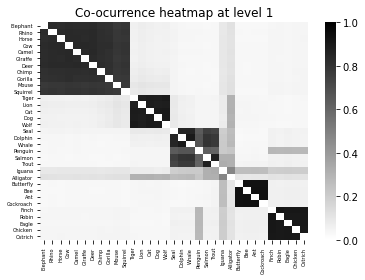

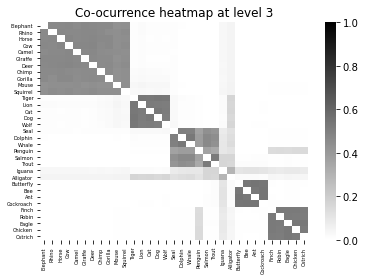

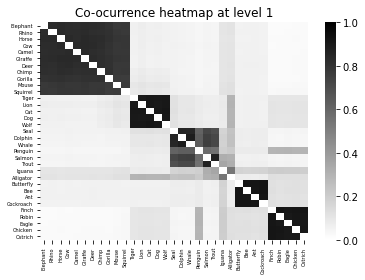

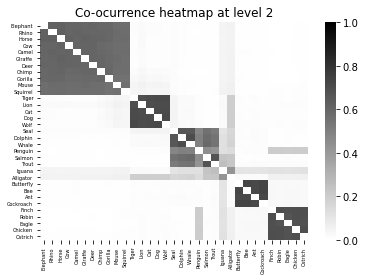

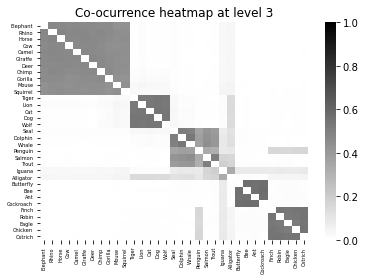

In [133]:
for ind in range(1, 3):
    path = '/Users/weipeng/Workspace/projects/rbhmc/coocurrence/animals/animals_0.1_0.1_{}/'.format(ind)

    all_labels = []
    for i in range(1, 50001):
        df = pd.read_csv('{}/animals_cooc_{}.csv'.format(path, i), header=0)
        val = df.values
        n = df.shape[0]
        if not all_labels:
            all_labels = [[] for _ in range(n)]

        for i in range(n):
            all_labels[i].append(val[i].tolist())

    cooc_dfs = []
    for i, labels in enumerate(all_labels):
        cooc_dfs.append(coocurrence(labels, i + 1, reordered_ani))

    dataname = 'animals'
    for i, cooc_df in enumerate(cooc_dfs):
        plt.figure()
        d = cooc_df.pivot('x', 'y', 'cooc')
        g = sns.heatmap(d, cmap='binary', 
                        #cmap='YlGnBu', 
    #                     linecolor='black', linewidths=0.5, 
                        vmin=0, vmax=1,
                        xticklabels=reordered_ani_labels, 
                        yticklabels=reordered_ani_labels)
        g.set(xlabel='', ylabel='')
        g.set_title('Co-ocurrence heatmap at level {}'.format(i + 1))
        g.set_yticklabels(reordered_ani_labels, fontsize=5)
        g.set_xticklabels(reordered_ani_labels, fontsize=5)
        plt.show()
        g.get_figure().savefig('{}-co-oc-level-{}-0.1-0.1-{}-rbhmc.pdf'
                               .format(dataname, i + 1, ind))

    plt.close('all')

In [24]:
# for i, labels in enumerate(all_labels):
#     cooc_list = coocurrence(labels)
#     plot(cooc_list, 'animals', i+1)

In [26]:
cooc_dfs = []
for i, labels in enumerate(all_labels):
    cooc_dfs.append(coocurrence(labels, i + 1, reordered_ani))
# df = pd.concat(cooc_dfs, ignore_index=True)

# def draw_heatmap(*args, **kwargs):
#     data = kwargs.pop('data')
#     d = data.pivot(index=args[1], columns=args[0], values=args[2])
#     sns.heatmap(d, xticklabels=False, yticklabels=False, **kwargs)

# plt.figure()
# g = sns.FacetGrid(df, col=r'$\ell$', col_wrap=4, aspect=1, sharey=True)
# g.map_dataframe(draw_heatmap, 'x', 'y', 'cooc', cmap='binary', linecolor='black',
#                 linewidths=0.5, vmin=0, vmax=1, square=False)
# g.set(xlabel='', ylabel='')

# dataname = 'animals'
# plt.savefig('co-oc-{}.pdf'.format(dataname))
# plt.close()

dataname = 'animals'
for i, cooc_df in enumerate(cooc_dfs):
    plt.figure()
    d = cooc_df.pivot('x', 'y', 'cooc')
    g = sns.heatmap(d, cmap='binary', 
#                     linecolor='black', linewidths=0.5, 
                    vmin=0, vmax=1,
                    xticklabels=reordered_ani_labels, 
                    yticklabels=reordered_ani_labels)
    g.set(xlabel='', ylabel='')
    g.set_title('Co-ocurrence heatmap at level {}'.format(i + 1))
    g.set_yticklabels(reordered_ani_labels, fontsize=5)
    g.set_xticklabels(reordered_ani_labels, fontsize=5)
    g.get_figure().savefig('{}-co-oc-level-{}.pdf'.format(dataname, i + 1))
    plt.close()


In [27]:
fmnist_reorder_df = pd.read_csv('fmnist_reorder.csv', header=None)

fmnist_reorder = fmnist_reorder_df.iloc[:, 0].values 
fmnist_reorder_labels = dict(zip(fmnist_reorder, range(100)))


In [108]:
dataname = 'fmnist'

for run_ind in range(1, 3):
    path = '/Users/weipeng/Workspace/projects/rbhmc/coocurrence/fmnist/fmnist_0.0_0.0_{}/'.format(run_ind)

    all_labels = []
    for i in range(1, 50001):
        df = pd.read_csv('{}/fmnist_cooc_{}.csv'.format(path, i), header=0)
        val = df.values
        n = df.shape[0]
        if not all_labels:
            all_labels = [[] for _ in range(n)]

        for i in range(n):
            all_labels[i].append(val[i].tolist())

    cooc_dfs = []
    for i, labels in enumerate(all_labels):
        cooc_dfs.append(coocurrence(labels, i + 1, fmnist_reorder_labels))
    
    for i, cooc_df in enumerate(cooc_dfs):
        plt.figure()
        d = cooc_df.pivot('x', 'y', 'cooc')
        g = sns.heatmap(d, cmap='binary',  
                        vmin=0, vmax=1, 
                        xticklabels=False, yticklabels=False)
        g.set(xlabel='', ylabel='')
        g.set_title('Co-ocurrence heatmap at level {}'.format(i + 1))
        (g.get_figure()
             .savefig('{}-co-oc-level-{}-0.0-0.0-{}-rbhmc.pdf'
                      .format(dataname, i + 1, run_ind)))
    plt.close('all')

In [109]:
dataname = 'fmnist'

for run_ind in range(1, 3):
    path = '/Users/weipeng/Workspace/projects/rbhmc/coocurrence/fmnist/fmnist_0.001_1.0_{}/'.format(run_ind)

    all_labels = []
    for i in range(1, 50001):
        df = pd.read_csv('{}/fmnist_cooc_{}.csv'.format(path, i), header=0)
        val = df.values
        n = df.shape[0]
        if not all_labels:
            all_labels = [[] for _ in range(n)]

        for i in range(n):
            all_labels[i].append(val[i].tolist())

    cooc_dfs = []
    for i, labels in enumerate(all_labels):
        cooc_dfs.append(coocurrence(labels, i + 1, fmnist_reorder_labels))
    
    for i, cooc_df in enumerate(cooc_dfs):
        plt.figure()
        d = cooc_df.pivot('x', 'y', 'cooc')
        g = sns.heatmap(d, cmap='binary',  
                        vmin=0, vmax=1, 
                        xticklabels=False, yticklabels=False)
        g.set(xlabel='', ylabel='')
        g.set_title('Co-ocurrence heatmap at level {}'.format(i + 1))
        (g.get_figure()
             .savefig('{}-co-oc-level-{}-0.001-1.0-{}-rbhmc.pdf'
                      .format(dataname, i + 1, run_ind)))
    plt.close('all')

In [110]:
dataname = 'fmnist'

for run_ind in range(1, 3):
    path = '/Users/weipeng/Workspace/projects/rbhmc/coocurrence/fmnist/fmnist_0.001_0.01_{}/'.format(run_ind)

    all_labels = []
    for i in range(1, 50001):
        df = pd.read_csv('{}/fmnist_cooc_{}.csv'.format(path, i), header=0)
        val = df.values
        n = df.shape[0]
        if not all_labels:
            all_labels = [[] for _ in range(n)]

        for i in range(n):
            all_labels[i].append(val[i].tolist())

    cooc_dfs = []
    for i, labels in enumerate(all_labels):
        cooc_dfs.append(coocurrence(labels, i + 1, fmnist_reorder_labels))
    
    for i, cooc_df in enumerate(cooc_dfs):
        plt.figure()
        d = cooc_df.pivot('x', 'y', 'cooc')
        g = sns.heatmap(d, cmap='binary',  
                        vmin=0, vmax=1, 
                        xticklabels=False, yticklabels=False)
        g.set(xlabel='', ylabel='')
        g.set_title('Co-ocurrence heatmap at level {}'.format(i + 1))
        (g.get_figure()
             .savefig('{}-co-oc-level-{}-0.001-0.01-{}-rbhmc.pdf'
                      .format(dataname, i + 1, run_ind)))
    plt.close('all')

In [38]:
dataname = 'fmnist'

fig, axes = plt.subplots(2, 4, figsize=(18.5, 7))


for run_ind in range(1, 3):
    path = '/Users/weipeng/Workspace/projects/rbhmc/coocurrence/fmnist/fmnist_0.0001_0.01_{}'.format(run_ind)

    all_labels = []
    for i in range(1, 50001):
        df = pd.read_csv('{}/fmnist_cooc_{}.csv'.format(path, i), header=0)
        val = df.values
        n = df.shape[0]
        if not all_labels:
            all_labels = [[] for _ in range(n)]

        for i in range(n):
            all_labels[i].append(val[i].tolist())

    cooc_dfs = []
    for i, labels in enumerate(all_labels):
        cooc_dfs.append(coocurrence(labels, i + 1, fmnist_reorder_labels))
    
    for i, cooc_df in enumerate(cooc_dfs):
        d = cooc_df.pivot('x', 'y', 'cooc')
        g = sns.heatmap(d, cmap='binary',  
                        vmin=0, vmax=1, 
                        xticklabels=False, yticklabels=False,
                        ax=axes[run_ind-1, i])
        g.set(xlabel='', ylabel='')
        g.set_title('Chain {} at level {}'.format(run_ind, i + 1))
    
    
plt.tight_layout()
plt.savefig('{}-co-oc-0.0001-0.01-rbhmc.pdf'.format(dataname))
#     plt.close('all')

In [39]:
dataname = 'fmnist'

fig, axes = plt.subplots(2, 4, figsize=(18.5, 7))


for run_ind in range(1, 3):
    path = '/Users/weipeng/Workspace/projects/rbhmc/coocurrence/fmnist/fmnist_0.0001_1.0_{}'.format(run_ind)

    all_labels = []
    for i in range(1, 50001):
        df = pd.read_csv('{}/fmnist_cooc_{}.csv'.format(path, i), header=0)
        val = df.values
        n = df.shape[0]
        if not all_labels:
            all_labels = [[] for _ in range(n)]

        for i in range(n):
            all_labels[i].append(val[i].tolist())

    cooc_dfs = []
    for i, labels in enumerate(all_labels):
        cooc_dfs.append(coocurrence(labels, i + 1, fmnist_reorder_labels))
    
    for i, cooc_df in enumerate(cooc_dfs):
        d = cooc_df.pivot('x', 'y', 'cooc')
        g = sns.heatmap(d, cmap='binary',  
                        vmin=0, vmax=1, 
                        xticklabels=False, yticklabels=False,
                        ax=axes[run_ind-1, i])
        g.set(xlabel='', ylabel='')
        g.set_title('Chain {} at level {}'.format(run_ind, i + 1))
    
    
plt.tight_layout()
plt.savefig('{}-co-oc-0.0001-1.0-rbhmc.pdf'.format(dataname))
#     plt.close('all')

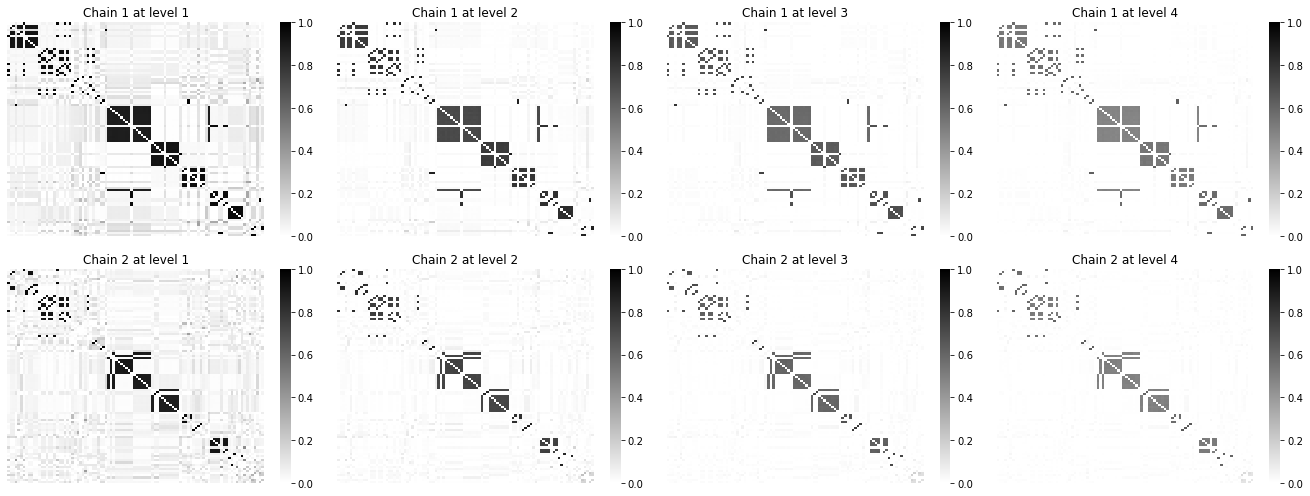

In [40]:
dataname = 'fmnist'

fig, axes = plt.subplots(2, 4, figsize=(18.5, 7))


for run_ind in range(1, 3):
    path = '/Users/weipeng/Workspace/projects/rbhmc/coocurrence/fmnist/fmnist_0.0_0.0_{}'.format(run_ind)

    all_labels = []
    for i in range(1, 50001):
        df = pd.read_csv('{}/fmnist_cooc_{}.csv'.format(path, i), header=0)
        val = df.values
        n = df.shape[0]
        if not all_labels:
            all_labels = [[] for _ in range(n)]

        for i in range(n):
            all_labels[i].append(val[i].tolist())

    cooc_dfs = []
    for i, labels in enumerate(all_labels):
        cooc_dfs.append(coocurrence(labels, i + 1, fmnist_reorder_labels))
    
    for i, cooc_df in enumerate(cooc_dfs):
        d = cooc_df.pivot('x', 'y', 'cooc')
        g = sns.heatmap(d, cmap='binary',  
                        vmin=0, vmax=1, 
                        xticklabels=False, yticklabels=False,
                        ax=axes[run_ind-1, i])
        g.set(xlabel='', ylabel='')
        g.set_title('Chain {} at level {}'.format(run_ind, i + 1))
    
    
plt.tight_layout()
plt.savefig('{}-co-oc-0.0-0.0-rbhmc.pdf'.format(dataname))
#     plt.close('all')

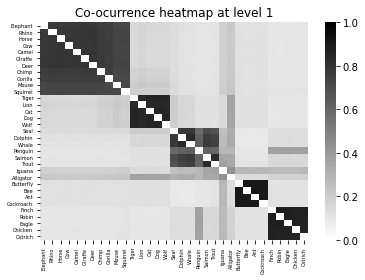

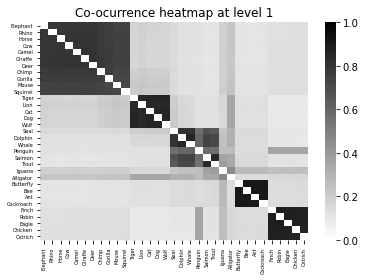

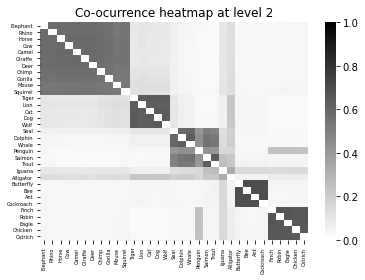

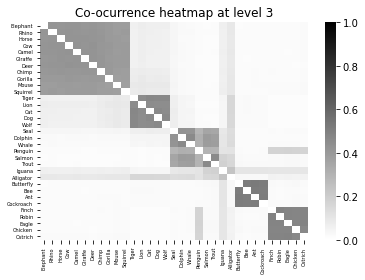

In [6]:
# for ind in range(1, 3):
#     path = '/Users/weipeng/Workspace/projects/rbhmc/coocurrence/animals/animals_1.0e-19_0.0_{}/'.format(ind)

#     all_labels = []
#     for i in range(1, 50001):
#         df = pd.read_csv('{}/animals_cooc_{}.csv'.format(path, i), header=0)
#         val = df.values
#         n = df.shape[0]
#         if not all_labels:
#             all_labels = [[] for _ in range(n)]

#         for i in range(n):
#             all_labels[i].append(val[i].tolist())

#     cooc_dfs = []
#     for i, labels in enumerate(all_labels):
#         cooc_dfs.append(coocurrence(labels, i + 1, reordered_ani))

#     dataname = 'animals'
#     for i, cooc_df in enumerate(cooc_dfs):
#         plt.figure()
#         d = cooc_df.pivot('x', 'y', 'cooc')
#         g = sns.heatmap(d, cmap='binary', 
#     #                     linecolor='black', linewidths=0.5, 
#                         vmin=0, vmax=1,
#                         xticklabels=reordered_ani_labels, 
#                         yticklabels=reordered_ani_labels)
#         g.set(xlabel='', ylabel='')
#         g.set_title('Co-ocurrence heatmap at level {}'.format(i + 1))
#         g.set_yticklabels(reordered_ani_labels, fontsize=5)
#         g.set_xticklabels(reordered_ani_labels, fontsize=5)
#         plt.show()
# #         g.get_figure().savefig('{}-co-oc-level-{}-0.1-0.1-{}-rbhmc.pdf'
# #                                .format(dataname, i + 1, ind))

#     plt.close('all')